# Principal Component Analysis (PCA)

In PCA we wish to perform dimensionality reduction on a dataset.

The derivation can be achieved in two ways:
1. the synthesis view, where we minise the average reconstruction error
2. 

## Synthesis view
The objective can be written as a Frobenius norm:
$J(W, Z) = ||X - WZ^T||^2_F$,

where $X$ is the data, $W$ is the parameters and $Z$ is an $n \times l$ matrix with $z_i$ as rows.

The Frobenius norm of a matrix $A$ is given by:
$||A||_F = \sqrt{\sum_i \sum_j a_{ij}^2 = \sqrt{tr(A^T A)}}$

The $W$ matrix has a contraint of orthogonality. The optimal solution is then achieved when $W$ contains the $l$ eigenvectors with largest eigenvalues of a covariance matrix of the data $\Sigma = \sum x_ix_i^T$

We can project the data into a low dimensional space $z_i = W^Tx_i$. This results in an orthogonal projection of the data onto the column space spanned by the eigenvectors. $w_j$ then forms an orthogonal set of basis vectors.

It can be shown as follows for the first component:

$J(w_1, z_1) = \frac{1}{N} = \sum||x_i - z_{i1}w_1||^2$

$J(w_1, z_1) = \frac{1}{N} = \sum(X_i^Tx_i - 2z_{i1}w_1^Tx_i + z_{i1}^2)$

where $w^Tw = 1$ due to the orthogonaliy assumption

Taking the derivitives w.r.t. $z_{i1}$ gives:

$z_{i1} = W_1^Tx_i$

This shows the optimal reconstruction weights are given by the orthogonal projection of the data onto the first principal component $w_1$.

## Analysis view

The analysis view shows that minimising the reconstruction error is equivalent to maximising the variance of the data.

## Implementation

In practise SVD is used to implement the algorithm. This allows non-square, $n \times d$, real, matrix, $X$, to be decomposed as follows:

$X = U S V^T$

- $U$ is $n \times n$ with orthonormal columns (eigenvector of $X X^T$)
- $U$ is $n \times d$ with orthonormal rows and columns ($\sqrt()$ of eigenvalues of $X X^T$ and $X^T X$)
- $V$ is $d \times d$ with orthonormal rows (eigenvector of $X^T X$)

Then $W = V$ and $Z=XW$ as shown above.

Hence PCA can be computed in just a few lines of code

Derivation follows K.P. Murphy "Machine Learning A Probabalistic Perspective".

Some more details: [stack exchange](https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca)

In [368]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Data

In [369]:
np.random.seed(123)
x = np.linspace(-1,1,200)
y = 5*x + np.random.normal(0,1,len(x))

In [370]:
X = np.array([x, y]).T
X -= X.mean(0, keepdims=True)

## From scratch

In [371]:
U, S, Vt = np.linalg.svd(X)
V = Vt.T
Lambda = S**2/(len(X)-1)

In [410]:
V

array([[-0.1768511 , -0.98423762],
       [-0.98423762,  0.1768511 ]])

## Sci-kit learn

In [374]:
pca = PCA(n_components=2).fit(X)

In [411]:
pca.components_.T

array([[-0.1768511 ,  0.98423762],
       [-0.98423762, -0.1768511 ]])

## Comparison

In [402]:
def gradients(x):
    return [np.polyfit([0, x[0,i]], [0, x[1,i]], 1)[0] for i in range(len(x))]

In [403]:
print('Eigenvectors equal:', np.array_equal(np.abs(V), np.abs(pca.components_)))
print('Eigenvalues equal:', np.array_equal(Lambda, pca.explained_variance_))

Eigenvectors equal: True
Eigenvalues equal: True


In [404]:
m_sk = gradients(pca.components_.T)
m_np = gradients(V)

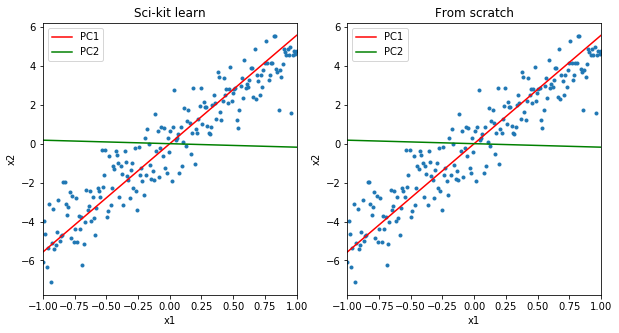

In [409]:
f, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(X[:,0], X[:,1], '.')
ax[0].plot(x, x*m_sk[0], 'r', label='PC1')
ax[0].plot(x, x*m_sk[1], 'g', label='PC2')
ax[0].set_xlim(-1,1)
ax[0].set(title='Sci-kit learn', xlabel='x1', ylabel='x2')
ax[0].legend()

ax[1].plot(X[:,0], X[:,1], '.')
ax[1].plot(x, x*m_np[0], 'r', label='PC1')
ax[1].plot(x, x*m_np[1], 'g', label='PC2')
ax[1].set_xlim(-1,1)
ax[1].set(title='From scratch', xlabel='x1', ylabel='x2')
ax[1].legend()